<a href="https://colab.research.google.com/github/alirezakhaleghianaghizi/ml_1401/blob/main/hw3_NN_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

علیرضا خالقی آناقیزی 
99101462

سوال 2

در قسمت زیر فایل های مورد نظر را در گوگل درایو ذخیره کردیم و سپسفایل های مورد نظر را لود کرده و دیتا های 
موجود را به ترتیب در ماتریس های 

SVT 

ذخیره کردیم.

In [1]:
import csv 
import numpy as np
from google.colab import drive

drive.mount('/content/drive')
filename1='/content/drive/MyDrive/ml/fashion-mnist.csv' 

fields = []
data = []
ValidationSet=[]
with open(filename1, 'r') as csvfile:
    # creating a csv reader object
    csvreader = csv.reader(csvfile)
     
    # extracting field names through first row
    fields = next(csvreader)
 
    # extracting each data row one by one 
    for row in csvreader:
      data.append(row)  

data=np.array(data,dtype=int).T
#print(data)
dataX=np.array(data[1:len(data)]).T
dataY=data[len(data)-1]
print(len(dataX[0]))
print(len(dataY))

Mounted at /content/drive
784
10000


در قسمت زیر با استفاده از کتابخانه 

sklearn 

با استفاده از تابع جدا سازی ابتدا ده ها ی نمرین را جدا کردیم و سپس از باقیمانده داده ها ولیدیشن و تست را جدا کردیم.

In [2]:
from sklearn.model_selection import train_test_split
train_ratio = 0.50
validation_ratio = 0.35
test_ratio = 0.15

# train is now 50% of the entire data set
x_train, x_test, y_train, y_test = train_test_split(dataX, dataY, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio) 

print(x_train, x_val, x_test)

[[0 0 0 ... 0 0 8]
 [0 0 0 ... 0 0 7]
 [1 0 1 ... 0 0 6]
 ...
 [0 0 0 ... 0 0 6]
 [0 0 0 ... 0 0 4]
 [0 0 0 ... 0 0 2]] [[0 0 0 ... 0 0 4]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 4]
 [0 0 0 ... 0 0 7]
 [0 0 0 ... 0 0 0]] [[0 0 0 ... 0 0 2]
 [0 0 0 ... 0 0 2]
 [0 0 0 ... 0 0 5]
 ...
 [0 0 0 ... 0 0 6]
 [0 0 0 ... 0 0 2]
 [0 0 0 ... 0 0 2]]


روش اول :
با استفاده از کتابخانه 

sklearn

توابع اس وی ام را خارج کردیم و از تابع خطی آن یادگیری را انجام دادیم.

در قسمت زیر تابعی مینویسم که با گرفتن لیبل های پیش بینی شده و لیبل های اصلی ماتریس خطا را میسازیم

In [3]:
def get_confusion(y_pred,y_true):
  confusion=[]
  for j in range(10):
    row=[]
    for i in range(10):
     k=0;
     for m in range(len(y_pred)):
       if y_pred[m]==i :
         if y_true[m]==j:
           k=k+1
     row.append(k)    
    confusion.append(row)
  return confusion

In [ ]:
from sklearn import svm
lin_clf = svm.LinearSVC()
lin_clf.fit(x_train,y_train)
y_val_pred=lin_clf.predict(x_val)
confusion_val_linear=get_confusion(y_pred=y_val_pred,y_true=y_val)
print(confusion_val_linear)
A_val_linear=np.trace(confusion_val_linear)/np.sum(confusion_val_linear)
print(A_val_linear)

[[291, 5, 24, 23, 6, 0, 30, 0, 4, 0], [0, 415, 2, 13, 10, 0, 2, 1, 3, 0], [6, 2, 313, 5, 65, 1, 20, 1, 3, 0], [22, 7, 8, 345, 28, 0, 8, 2, 2, 1], [5, 0, 75, 21, 262, 0, 25, 0, 7, 0], [3, 0, 4, 0, 4, 322, 4, 32, 5, 14], [58, 3, 103, 19, 60, 0, 197, 0, 9, 0], [1, 0, 0, 0, 2, 17, 0, 410, 2, 21], [5, 0, 4, 6, 14, 3, 19, 3, 394, 3], [0, 0, 1, 0, 2, 16, 2, 34, 0, 391]]
0.7858823529411765


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


در این روش چون ما پارامتر انتخابی نداریم همان پیش بینی را برای داده های تست انجام میدهیم و ماتریس مورد نظر و دقت آن را مینویسیم.

In [ ]:
y_test_pred=lin_clf.predict(x_test)
confusion_test_linear=get_confusion(y_pred=y_test_pred,y_true=y_test)
print(confusion_test_linear)
A_test_linear=np.trace(confusion_test_linear)/np.sum(confusion_test_linear)
print(A_test_linear)

[[56, 0, 5, 5, 1, 0, 7, 0, 1, 0], [1, 69, 1, 2, 1, 0, 0, 0, 0, 0], [5, 0, 55, 0, 10, 0, 3, 0, 1, 0], [5, 1, 4, 62, 2, 0, 3, 0, 0, 0], [2, 0, 15, 5, 62, 0, 6, 0, 0, 0], [0, 0, 2, 0, 0, 59, 1, 6, 2, 3], [15, 0, 18, 4, 7, 0, 25, 0, 0, 0], [0, 0, 0, 0, 0, 5, 0, 60, 0, 4], [1, 0, 3, 1, 0, 2, 3, 0, 60, 0], [0, 0, 0, 0, 0, 2, 1, 6, 0, 70]]
0.7706666666666667


دیدیم در هر دو داده های ولیدیشن وتست دقت ما در حدود 0.75 میباشد و ماتریس های خطا نیز در بالا قابل مشاهده هستند وچون داده های ولیدیشن از دو برابر تست بیشتر است ماتریس آن نیز درایه هایش بزرگتر هستند.

روش دوم :
در اینجا ما کرنل مورد نظر را به صورت گاووسی قرار میدهیم.
گوسی همان 

RBF

با این تقاوت که پارامتر 

c

 آن برابر یک در نظر گرفته میشود . 
 حال برای یک بازه از مقدار گاما میبینیم بهترین دقت برای کدام یکی است .
 

In [ ]:
from sklearn.svm import SVC
gamma_1d_range = np.logspace(-9,3,13)
classifiers = []
min_gamma=0;
max_A=0;
for mygamma in gamma_1d_range:
  clf = SVC( kernel='rbf',C=1, gamma=mygamma)
  clf.fit(x_train, y_train)
  y_val_pred=clf.predict(x_val)
  confusion_val_gaussian=get_confusion(y_pred=y_val_pred,y_true=y_val)
  #print(confusion_val_gaussian)
  A_val_gaussian=np.trace(confusion_val_gaussian)/np.sum(confusion_val_gaussian)
  classifiers.append(A_val_gaussian)
  if A_val_gaussian>max_A:
    min_gamma=mygamma
    max_A=A_val_gaussian
print(min_gamma)
print(classifiers)



        

1e-07
[0.6517647058823529, 0.7832941176470588, 0.8505882352941176, 0.8341176470588235, 0.1275294117647059, 0.09788235294117648, 0.09788235294117648, 0.09788235294117648, 0.09788235294117648, 0.09788235294117648, 0.09788235294117648, 0.09788235294117648, 0.09788235294117648]


طبق محاسبات بالا برای گاما در حدود ده به توان منفی 7 مقدار دقت ما بیشینه شده است 
حال در حدود این اوردر دوباره نگاه نگاه میکنه ببینیم چه ضریبی در این اوردر مناسب است 
نکته محاسبات بالا در حدود بیست دقیقه طول کشید و یکمقدار کند بوده است دوباره بیست دقیقه لازم است تا ضریب را به دست آوریم

In [ ]:
from sklearn.svm import SVC
gamma_2d_range = (np.array(range(9))+1)*min_gamma
classifiers = []
conf_Matrixes=[]
min_gamma=0;
max_A=0;
for mygamma in gamma_2d_range:
  clf = SVC( kernel='rbf',C=1, gamma=mygamma)
  clf.fit(x_train, y_train)
  y_val_pred=clf.predict(x_val)
  confusion_val_gaussian=get_confusion(y_pred=y_val_pred,y_true=y_val)
  #print(confusion_val_gaussian)
  A_val_gaussian=np.trace(confusion_val_gaussian)/np.sum(confusion_val_gaussian)
  classifiers.append(A_val_gaussian)
  if A_val_gaussian>max_A:
    min_gamma=mygamma
    max_A=A_val_gaussian
    conf_Matrixes=confusion_val_gaussian
print(min_gamma)
print(classifiers)
print(conf_Matrixes)

5e-07
[0.8505882352941176, 0.8616470588235294, 0.8632941176470589, 0.8642352941176471, 0.8644705882352941, 0.8609411764705882, 0.8552941176470589, 0.8510588235294118, 0.8432941176470589]
[[333, 0, 7, 13, 0, 1, 23, 0, 6, 0], [4, 420, 6, 12, 2, 0, 1, 0, 1, 0], [2, 0, 337, 5, 43, 0, 20, 0, 9, 0], [28, 1, 3, 372, 10, 0, 7, 0, 2, 0], [0, 0, 39, 11, 311, 0, 29, 0, 5, 0], [1, 0, 0, 0, 0, 359, 0, 20, 4, 4], [81, 0, 68, 11, 24, 0, 262, 0, 3, 0], [0, 0, 0, 0, 0, 13, 0, 427, 1, 12], [0, 0, 3, 0, 1, 2, 3, 3, 439, 0], [0, 0, 0, 0, 0, 11, 0, 21, 0, 414]]


:با توجه به نتایج بالا بهترین گاما برابر5در ده به توان منفی 7 هستش که دقت آن برابر 0.86 میباشد 
حال با توجه به این مقدار برای داده های تست دقت و ماتریس را تشکیل میدهیم.

In [ ]:
from sklearn.svm import SVC
best_gamma_gaussian=min_gamma
clf = SVC( kernel='rbf',C=1, gamma=best_gamma_gaussian)
clf.fit(x_train, y_train)
y_test_pred=clf.predict(x_test)
confusion_test_gaussian=get_confusion(y_pred=y_test_pred,y_true=y_test)
print(confusion_test_gaussian)
A_test_gaussian=np.trace(confusion_test_gaussian)/np.sum(confusion_test_gaussian)
print(A_test_gaussian)

[[57, 0, 1, 1, 0, 0, 5, 0, 1, 0], [1, 71, 1, 3, 0, 0, 0, 0, 1, 0], [2, 0, 63, 1, 12, 0, 4, 0, 0, 0], [4, 0, 1, 68, 4, 0, 1, 0, 0, 0], [0, 0, 6, 1, 64, 0, 13, 0, 0, 0], [0, 0, 0, 0, 0, 50, 0, 2, 1, 1], [13, 0, 7, 0, 8, 0, 50, 0, 4, 0], [0, 0, 0, 0, 0, 1, 0, 69, 0, 4], [0, 0, 2, 0, 0, 1, 3, 2, 82, 0], [0, 0, 0, 0, 0, 0, 0, 3, 0, 61]]
0.8466666666666667


نتیجه نهایی در کرنل گووسی با گاما مورد نظر دقت برابر 0.846 و ماتریس مورد نظر نیز در بالا میباشد که نسبت به یادگیری خطی نتیجه بهتری به دست آوردیم .

In [ ]:
#from sklearn.gaussian_process import GaussianProcessClassifier
#from sklearn.gaussian_process.kernels import RBF
#classifiers = []
#gammas=np.logspace(-9,3,13)
#min_gamma=0;
#max_A=0;
#for gamma in gammas :
#  kernel = 1.0 * RBF(gamma)
#  gpc = GaussianProcessClassifier(kernel=kernel, random_state=0).fit(x_train, y_train)
#  y_val_pred=gpc.predict(x_val)
#  confusion_val_gaussian=get_confusion(y_pred=y_val_pred,y_true=y_val)
  #print(confusion_val_gaussian)
#  A_val_gaussian=np.trace(confusion_val_gaussian)/np.sum(confusion_val_gaussian)
#  classifiers.append(A_val_gaussian)
#  if A_val_gaussian>max_A:
#    min_gamma=mygamma
#    max_A=A_val_gaussian
#print(min_gamma)
#print(classifiers)

روش سوم :
در اینجا از کتابخانه 

sklearn .knn

 استفاده میکنیم که پارامتر متریک را باید اقلیدسی بگذاریم تا فاصله اقلیدسی حساب کند سپس برای 

 k 

 های مختلف مقدار دقت را حساب میکنیم.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k_1d=np.logspace(0,3,4)
classifiers = []
min_k=0;
max_A=0;
#x_train = x_train.astype(int)
#print(y_train)
#y_train = y_train.astype(int)
#print(y_train)
for myk in k_1d:
  knn = KNeighborsClassifier(n_neighbors=int(myk),metric='euclidean')  
  knn.fit(x_train,y_train) 
  y_val_pred=knn.predict(x_val)
  confusion_val_knn=get_confusion(y_pred=y_val_pred,y_true=y_val)
  #print(confusion_val_gaussian)
  A_val_knn=np.trace(confusion_val_knn)/np.sum(confusion_val_knn)
  classifiers.append(A_val_knn)
  if A_val_knn>max_A:
    min_k=myk
    max_A=A_val_knn
print(min_k)
print(classifiers)




10.0
[0.796, 0.808235294117647, 0.7567058823529412, 0.6143529411764705]


در بالا دیدیم در بازه همسایه های 10 تایی جواب خوبی به دست آورده ایم.
و الان در ضرایب آن میبینیم چه عددی بهتر است

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k_2d = [*(np.array(range(9))+1)*10/10,*(np.array(range(9))+1)*10]
classifiers = []
conf_Matrixes=[]
min_k=0;
max_A=0;
for myk in k_2d:
  knn = KNeighborsClassifier(n_neighbors=int(myk),metric='euclidean')  
  knn.fit(x_train,y_train) 
  y_val_pred=knn.predict(x_val)
  confusion_val_knn=get_confusion(y_pred=y_val_pred,y_true=y_val)
  #print(confusion_val_gaussian)
  A_val_knn=np.trace(confusion_val_knn)/np.sum(confusion_val_knn)
  classifiers.append(A_val_knn)
  if A_val_knn>max_A:
    min_k=myk
    max_A=A_val_knn
    conf_Matrixes=confusion_val_knn
print(min_k)
print(classifiers)
print(conf_Matrixes)

4.0
[0.796, 0.7988235294117647, 0.8030588235294117, 0.8110588235294117, 0.804, 0.8032941176470588, 0.804, 0.8072941176470588, 0.8075294117647058, 0.808235294117647, 0.7971764705882353, 0.788, 0.780235294117647, 0.7750588235294118, 0.7687058823529411, 0.7611764705882353, 0.7581176470588236, 0.7592941176470588]
[[327, 0, 14, 9, 3, 0, 26, 0, 4, 0], [3, 422, 6, 9, 3, 0, 2, 0, 1, 0], [6, 0, 309, 4, 49, 0, 46, 0, 2, 0], [42, 6, 4, 343, 17, 0, 11, 0, 0, 0], [1, 0, 59, 15, 269, 0, 50, 0, 1, 0], [2, 0, 0, 1, 0, 298, 1, 51, 2, 33], [103, 0, 82, 10, 33, 0, 219, 0, 2, 0], [0, 0, 0, 0, 0, 6, 0, 427, 0, 20], [8, 0, 6, 1, 2, 1, 6, 12, 415, 0], [0, 0, 0, 0, 0, 3, 1, 24, 0, 418]]


حال با توجه به بهینه ترین تعداد همسایه میتوانیم برای داده های تست به دست آوریم
در بالا نیز دقت و ماتریس خطا برای داده های ولیدیشن در بهترین نقاط همسایه نمایش داده شده است.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
best_k=min_k
knn = KNeighborsClassifier(n_neighbors=int(best_k),metric='euclidean')  
knn.fit(x_train,y_train)
y_test_pred=knn.predict(x_test)
confusion_test_knn=get_confusion(y_pred=y_test_pred,y_true=y_test)
print(confusion_test_knn)
A_test_knn=np.trace(confusion_test_knn)/np.sum(confusion_test_knn)
print(A_test_knn)

[[65, 0, 0, 0, 0, 0, 9, 0, 1, 0], [0, 73, 0, 1, 0, 0, 0, 0, 0, 0], [5, 0, 54, 0, 7, 0, 8, 0, 0, 0], [5, 0, 1, 66, 3, 0, 2, 0, 0, 0], [0, 0, 14, 5, 67, 0, 4, 0, 0, 0], [1, 0, 1, 0, 1, 48, 1, 16, 0, 5], [20, 0, 13, 0, 5, 0, 30, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 64, 0, 5], [1, 0, 0, 0, 1, 0, 3, 3, 62, 0], [0, 0, 0, 0, 0, 0, 0, 5, 0, 74]]
0.804


در بالا مشاهده میکنیم که دقت ما برای داده های تست 0.804 میباشد که نسبت به تبدیل خطی بهتر بوده ولی نسبت به تبدیل گووسی کمتر میباشد .
ماتریس خطا نیز در بالا قابل مشاهدهد است.

روش چهارم:
طبقه بندی

در این روش دیگر پارامتری مورد نیاز نیست که بهترین مقدارش را پیدا کنیم.

In [ ]:
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(x_train,y_train)
y_val_pred=tree_clf.predict(x_val)
confusion_val_tree=get_confusion(y_pred=y_val_pred,y_true=y_val)
print(confusion_val_tree)
A_val_tree=np.trace(confusion_val_tree)/np.sum(confusion_val_tree)
print(A_val_tree)

[[383, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 446, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 416, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 423, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 395, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 388, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 449, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 453, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 451, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 446]]
1.0


خب در بالا نتیجه حاصل از یادگیری این گونه شد که دقت داده های ولیدیشن برابر1 و ماتریس مورد نظر نیز قابل مشاهده است 

In [ ]:

y_test_pred=tree_clf.predict(x_test)
confusion_test_tree=get_confusion(y_pred=y_test_pred,y_true=y_test)
print(confusion_test_tree)
A_test_tree=np.trace(confusion_test_tree)/np.sum(confusion_test_tree)
print(A_test_tree)

[[75, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 74, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 74, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 77, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 90, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 73, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 69, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 69, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 70, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 79]]
1.0


در بالا نیز نتیجه نهایی برای داده های تست دقت ما 1 شد که این نتیجه از بقیه نتیجه گیری ها بهتر بوده است و کمی عجیب است که خطایی ندارد.

روش پنجم :    شبکه های عصبی



در اینجا داده ها را با تنسور فلو میخواستیم لرن کنیم ولی کتاب خانه تورچ بهتر بوده پس فقط مدل تنسوری را در زیر تشکیل دادیم.

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
 
    tf.keras.layers.Dense(units=100, activation='softmax',
                          input_shape=[x_train.shape[1]]),
    tf.keras.layers.Dense(units=100, activation='softmax'),
    tf.keras.layers.Dense(units=1,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 88,701
Trainable params: 88,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="SGD", loss=tf.keras.losses.BinaryCrossentropy) 

در زیر داده هار ا به تنسور تبدیل کردیم .

In [4]:
import warnings
warnings.filterwarnings("ignore")
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython import display
display.set_matplotlib_formats("svg")


X_train = torch.tensor(x_train, dtype=torch.float)
Y_train = torch.tensor(y_train, dtype=torch.long)
X_val = torch.tensor(x_val, dtype=torch.float)
Y_val = torch.tensor(y_val, dtype=torch.long)
X_test = torch.tensor(x_test, dtype=torch.float)
Y_test = torch.tensor(y_test, dtype=torch.long)

train_data = TensorDataset(X_train, Y_train)
val_data = TensorDataset(X_val, Y_val)
test_data = TensorDataset(X_test, Y_test)
batch_size=128
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)
val_loader = DataLoader(val_data, shuffle=True, batch_size=batch_size)

print("Training data batches:")
for X, y in train_loader:
    print(X.shape, y.shape)
    
print("\nTest data batches:")
for X, y in test_loader:
    print(X.shape, y.shape)

Training data batches:
torch.Size([128, 784]) torch.Size([128])
torch.Size([128, 784]) torch.Size([128])
torch.Size([128, 784]) torch.Size([128])
torch.Size([128, 784]) torch.Size([128])
torch.Size([128, 784]) torch.Size([128])
torch.Size([128, 784]) torch.Size([128])
torch.Size([128, 784]) torch.Size([128])
torch.Size([128, 784]) torch.Size([128])
torch.Size([128, 784]) torch.Size([128])
torch.Size([128, 784]) torch.Size([128])
torch.Size([128, 784]) torch.Size([128])
torch.Size([128, 784]) torch.Size([128])
torch.Size([128, 784]) torch.Size([128])
torch.Size([128, 784]) torch.Size([128])
torch.Size([128, 784]) torch.Size([128])
torch.Size([128, 784]) torch.Size([128])
torch.Size([128, 784]) torch.Size([128])
torch.Size([128, 784]) torch.Size([128])
torch.Size([128, 784]) torch.Size([128])
torch.Size([128, 784]) torch.Size([128])
torch.Size([128, 784]) torch.Size([128])
torch.Size([128, 784]) torch.Size([128])
torch.Size([128, 784]) torch.Size([128])
torch.Size([128, 784]) torch.Size(

در زیر کلاس مدل شبکه عصبی را نوشتیم که سه لایه دارد و لایه  آخر تابع اش معلوم است ولی توابع مخفی معلوم نیستند.

In [5]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        data_fetures=28*28
        self.input = nn.Linear(in_features=784, out_features=100)
        self.hidden_1 = nn.Linear(in_features=100, out_features=100)
        self.hidden_2 = nn.Linear(in_features=100, out_features=100)
        self.output = nn.Linear(in_features=100, out_features=10)
        
    def forward(self, x,hidden_func):
        x = hidden_func(self.input(x))
        x = hidden_func(self.hidden_1(x))
        x = hidden_func(self.hidden_2(x))
        return F.softmax(self.output(x))

در بخش زیر بین  یک سری توابع اکتیویشن میسنجیم ببینیم دقت کدام مدل بهتر است.

در زیر تابع هزینه ای که با دادن تابع مخفی مقدار 

In [16]:
functions=[F.softmax,F.elu,F.sigmoid,F.tanh,F.tanhshrink]
print(functions)

[<function softmax at 0x7fbfed461dc0>, <function elu at 0x7fbfed4618b0>, <function sigmoid at 0x7fbfed463040>, <function tanh at 0x7fbfed461f70>, <function tanhshrink at 0x7fbfed461b80>]


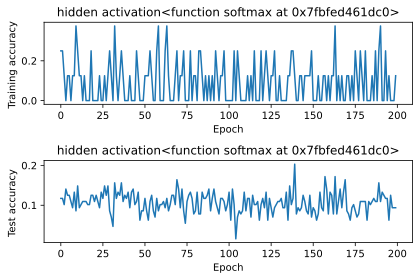

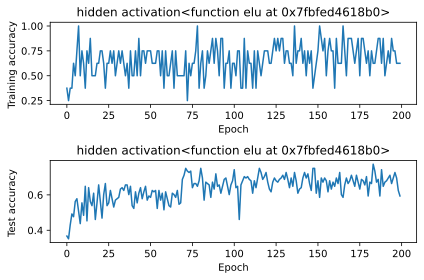

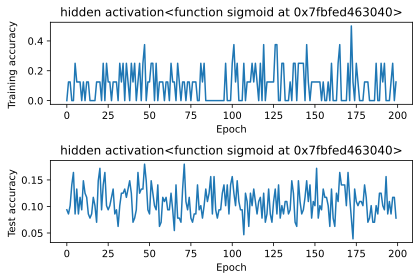

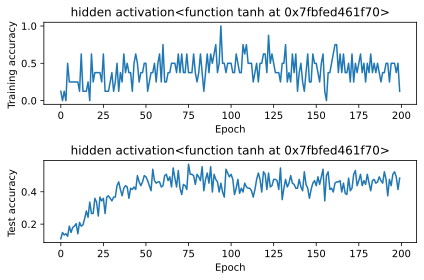

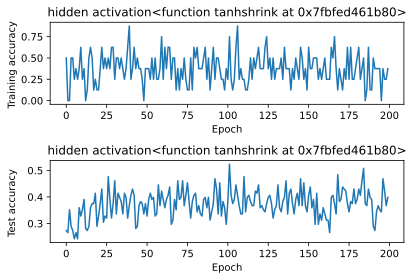

the best hidden function is
<function elu at 0x7fbfed4618b0>
the accuracie of best func is 
0.59375


In [51]:
def val_loss(train_loader,val_loader,hidden_function):
  model = Net() 
  num_epochs = 200
  train_accuracies, test_accuracies = [], []
  loss_function = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(params=model.parameters(), lr=0.001)
  for epoch in range(num_epochs):
    # Train set
    for X, y in train_loader:
        preds = model(X,hidden_function)
        pred_labels = torch.argmax(preds, axis=1)
        loss = loss_function(preds, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_accuracies.append( torch.mean((pred_labels == y).float()).item())
    
    # validation set
    X, y = next(iter(val_loader))
    pred_labels = torch.argmax(model(X,hidden_function), axis=1)
    test_accuracies.append( torch.mean((pred_labels == y).float()).item())
    
  fig = plt.figure(tight_layout=True)
  gs = gridspec.GridSpec(nrows=2, ncols=1)
  ax = fig.add_subplot(gs[0, 0])
  ax.plot(train_accuracies)
  ax.set_xlabel("Epoch")
  ax.set_ylabel("Training accuracy ")
  ax.set_title("hidden activation"+str(hidden_function))

  ax = fig.add_subplot(gs[1, 0])
  ax.plot(test_accuracies)
  ax.set_xlabel("Epoch")
  ax.set_ylabel("Test accuracy ")
  ax.set_title("hidden activation"+str(hidden_function))
  fig.align_labels()
  plt.show()
  return (test_accuracies[len(test_accuracies)-1]) 

bestacur=0
best_func=F.softmax
for func in functions:
  acure1=(val_loss(train_loader,val_loader,func))
  if acure1>bestacur:
    bestacur=acure1
    best_func=func
  
  
print("the best hidden function is")
print(best_func)
print("the accuracie of best func is ")
print(bestacur)

با استفاده از بالا ما بهترین تابع اکتیویشن از بین چند موردی که استفاده میکنیم را به دست می آوریم .
البته جواب یکسانی به ما نمیدهد و هر سری این تابع تغییر میکند

ولی در ماردی که ما انجام دادیم این دقت 0.59 با استفاده از تابع فعال سازی اکسپونانسیل  بوده است.

حال در زیر ما با استفاده از بهترین تابع فعال سازی بر روی داده های تست نیز این یادگیری را دوباره انجام میدهیم.

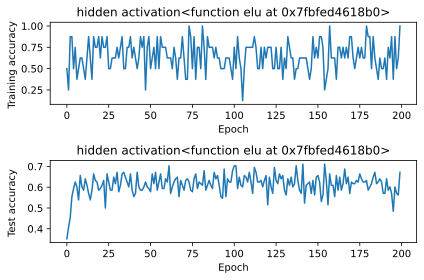

test_accuricy0.671875
[[0, 0, 2, 6, 0, 0, 11, 0, 0, 0], [0, 12, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 15, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 15, 0, 0, 0, 0, 0, 0], [0, 0, 2, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 0, 0, 13, 0, 0, 0, 0], [0, 0, 2, 2, 0, 0, 12, 0, 0, 0], [0, 0, 0, 0, 0, 6, 0, 0, 0, 3], [0, 0, 1, 0, 0, 0, 0, 0, 6, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 13]]


In [52]:
def test_loss(train_loader,test_data,hidden_function):
  model = Net() 
  num_epochs = 200
  train_accuracies, test_accuracies = [], []
  loss_function = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(params=model.parameters(), lr=0.001)
  for epoch in range(num_epochs):
    # Train set
    for X, y in train_loader:
        preds = model(X,hidden_function)
        pred_labels = torch.argmax(preds, axis=1)
        loss = loss_function(preds, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_accuracies.append( torch.mean((pred_labels == y).float()).item())
    
    # validation set
    X, y = next(iter(test_data))
    pred_labels = torch.argmax(model(X,hidden_function), axis=1)
    confusion_nn=get_confusion(pred_labels,y)
    test_accuracies.append( torch.mean((pred_labels == y).float()).item())
    
  fig = plt.figure(tight_layout=True)
  gs = gridspec.GridSpec(nrows=2, ncols=1)
  ax = fig.add_subplot(gs[0, 0])
  ax.plot(train_accuracies)
  ax.set_xlabel("Epoch")
  ax.set_ylabel("Training accuracy ")
  ax.set_title("hidden activation"+str(hidden_function))

  ax = fig.add_subplot(gs[1, 0])
  ax.plot(test_accuracies)
  ax.set_xlabel("Epoch")
  ax.set_ylabel("Test accuracy ")
  ax.set_title("hidden activation"+str(hidden_function))
  fig.align_labels()
  plt.show()
  return (test_accuracies[len(test_accuracies)-1]) ,confusion_nn
acureety_of_test,confusion=(test_loss(train_loader,test_loader,best_func))
print("test_accuricy" +str(acureety_of_test))
print(confusion)


در نتیجه نهایی که در بالا مشاهده میکنیم نمودار های دقت اندازه گیری در زمان های مختلف قابل مشاهده هستند  همچنین دقت تنایی روی داده های تست برابر 0.67 شد که نسبت به چهار حالت قبلی دقت کمتری داشت و این به دلیل این بود که لایه های بسیار تعداد محدود داشتند و طبق مشاهدات قبلی دیده بودیم که با لایه های بیشتر از 18 به خطا کمتر از 3 میرسیم ولی با لایه های محدود خطا زیاد است.